# Importing the dependencies


In [ ]:
from pathlib import Path
from math import pi, cos, acos, sqrt, inf, log
import time
from google.colab import drive
import random
import os
import matplotlib.pylab as plt
%matplotlib inline
import copy
import pandas as pd
import numpy as np
import sys

# Notebook Configuration
In order to execute this notebook on the dataset provided you need to upload the dataset folder zipped on google colab.  
To do that click on the folder icon on the left of google colab and then on the upload button.

In [ ]:
!unzip mincut_dataset.zip

Archive:  mincut_dataset.zip
replace output_random_10_25.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

We define a time threshold in order to avoid execution times too long.  
As default we decided to set it to two minutes

In [ ]:
timeout_threshold=inf

# Definition of the algorithms

We start by defining a simple algorithm which given the path to a text file containing the dataset returns:
* The adiacence list of the graph
* The number of iterations $k$ needed for the karger algorithm to obtain the correct solution with probability higher than $1-\frac{1}{n}$
* The number of nodes $n$

In [ ]:
def import_graph(dataset_path):
  dataset = open(dataset_path,"r").read().split("\n")
  n_nodes=len(dataset)
  
  adiacence_list={}
  n=0
  for node_data in dataset:
    elements=node_data.split()
    #Condition needed to avoid errors obtained by reaching the EOF
    if len(elements)>0:
      n=n+1
      node_name=int(elements[0])
      adiacence_list[node_name]=[]
      for i in range(1,len(elements)):
        adiacence_list[node_name].append(int(elements[i]))
  k=int(((n**2)/2)*log(n))
  return adiacence_list, k, n

Then we proceed to define the _full_contraction_ algorithm which contracts the graph until we have two nodes by picking at random two nodes at each iteration.

In [ ]:
def full_contraction(graph):
    while len(graph) > 2:
         v = random.choice(list(graph.keys()))
         w = random.choice(graph[v])
         single_contraction(graph, v, w)
    mincut = len(graph[list(graph.keys())[0]])
    return mincut

def single_contraction(graph, v, w):
    for node in graph[w]:
         if node != v:
             graph[v].append(node)
         graph[node].remove(w)
         if node != v:
              graph[node].append(v)
    del graph[w] 

Now we can implement the _karger_ algorithm which runs the previously defined _full_contraction_ algorithm $k$ times and returns the best solution found.  
If $k=\frac{n^2}{2}*ln(n)$ then the algorithm has a probability of $\frac{1}{n}$ of not returning the correct solution.

In [ ]:
def karger(graph, k):
  min_cut=inf
  starting_time=time.time()
  discovery_time=0
  contraction_time=0
  for i in range(0,k):
    if time.time()>starting_time+timeout_threshold:
      break
    graph_copy=copy.deepcopy(graph)
    full_contraction_start_time=time.time()
    cut=full_contraction(graph_copy)
    contraction_time=contraction_time+(time.time()-full_contraction_start_time)
    if cut<min_cut:
      discovery_time=time.time()-starting_time
      min_cut=cut
  total_time=time.time()-starting_time
  return discovery_time,contraction_time/k ,total_time, min_cut

#Executing on the dataset

We can now proceed to run the algorithm on all the datasets.  
To do that we define a method called _execute_all_ which also keeps track of the results and times of the single executions.

In [ ]:
'''
def execute_all():
    results=[]
    instruction_time=0
    datasets=[el for el in os.listdir(Path().absolute()) if el.endswith(".txt")]

    datasets.sort(key=lambda x: int(x.split("_")[2]))

    for dataset_name in datasets:
    #dataset_name="input_random_21_100.txt"
        if dataset_name.startswith("input"):
            adiacence_list, k, n=import_graph(str(Path().absolute())+"/"+dataset_name)
            print("Executing algorithm on dataset: "+dataset_name+" "+str(k)+" times")
            discovery_time, contraction_time ,total_time, min_cut=karger(adiacence_list, k)
            output_file_name="output"+dataset_name[5:]
            correct_output=int(open(str(Path().absolute())+"/"+output_file_name,"r").read())
            error=((min_cut-correct_output)/correct_output)*100
            asintotic_full_contraction_time=n**2
            asintotic_karger_time=(n**4)*log(n)
            instruction_time+=total_time/asintotic_karger_time
            results.append([dataset_name,n,k,min_cut,correct_output,error,discovery_time,
                            asintotic_full_contraction_time,contraction_time,asintotic_karger_time,total_time
                            ])
    instruction_time=instruction_time/len(results)
    for i in range(len(results)):

        results[i][7]*=instruction_time
        results[i][9]*=instruction_time

    return results
'''

'\ndef execute_all():\n    results=[]\n    instruction_time=0\n    datasets=[el for el in os.listdir(Path().absolute()) if el.endswith(".txt")]\n\n    datasets.sort(key=lambda x: int(x.split("_")[2]))\n\n    for dataset_name in datasets:\n    #dataset_name="input_random_21_100.txt"\n        if dataset_name.startswith("input"):\n            adiacence_list, k, n=import_graph(str(Path().absolute())+"/"+dataset_name)\n            print("Executing algorithm on dataset: "+dataset_name+" "+str(k)+" times")\n            discovery_time, contraction_time ,total_time, min_cut=karger(adiacence_list, k)\n            output_file_name="output"+dataset_name[5:]\n            correct_output=int(open(str(Path().absolute())+"/"+output_file_name,"r").read())\n            error=((min_cut-correct_output)/correct_output)*100\n            asintotic_full_contraction_time=n**2\n            asintotic_karger_time=(n**4)*log(n)\n            instruction_time+=total_time/asintotic_karger_time\n            results.app

In [ ]:
def execute_all():
    results=[]
    datasets=[el for el in os.listdir(Path().absolute()) if el.endswith(".txt")]

    datasets.sort(key=lambda x: int(x.split("_")[2]))

    for dataset_name in datasets:
    #dataset_name="input_random_21_100.txt"
        if dataset_name.startswith("input"):
            adiacence_list, k, n=import_graph(str(Path().absolute())+"/"+dataset_name)
            if n!=75:
              continue
            print("Executing algorithm on dataset: "+dataset_name+" "+str(k)+" times")
            discovery_time, contraction_time ,total_time, min_cut=karger(adiacence_list, k)
            output_file_name="output"+dataset_name[5:]
            correct_output=int(open(str(Path().absolute())+"/"+output_file_name,"r").read())
            error=((min_cut-correct_output)/correct_output)*100
            asintotic_full_contraction_time=n**2
            asintotic_karger_time=(n**4)*log(n)
            results.append([dataset_name,n,k,min_cut,correct_output,error,discovery_time,
                            asintotic_full_contraction_time,contraction_time,asintotic_karger_time,total_time
                            ])
            break
    return results


In [ ]:
results=execute_all()

Executing algorithm on dataset: input_random_17_75.txt 12142 times


# Plotting the results

In [ ]:
header =[
         'Dataset Name',
         'Number of Nodes', 
         'Number of Iterations(K)',
         'Solution Found',
         'Optimal Solution',
         'Error(%)',
         "Discovery Time",
         "Asintotic Contraction Time",
         "Avg Contraction Time",
         "Asintotic Karger Time",
         "Total Time"
]
table_properties = {
    'font-size': '10pt',
    'border-color': 'black',
    'border-style' :'solid' ,
    'border-width': '1px',
    'padding': '5px',
    'text-align': 'center'
}
header_properties = [{'selector': 'th', 
                      'props': [
                                ('font-size', '10pt'),
                                ('padding-top', '5px'),
                                ('padding-bottom', '5px'),
                                ('padding-left', '5px'),
                                ('padding-right', '5px'),
                                ('border-color', 'black'),
                                ('border-style' ,'solid') ,
                                ('border-width', '1px'),
                                ("word-wrap","break-word")
                      ]
}]

df = pd.DataFrame(results, columns=header).style.set_properties(**table_properties).set_table_styles(header_properties).hide_index()

df

Dataset Name,Number of Nodes,Number of Iterations(K),Solution Found,Optimal Solution,Error(%),Discovery Time,Asintotic Contraction Time,Avg Contraction Time,Asintotic Karger Time,Total Time
input_random_17_75.txt,75,12142,19,19,0.000000,3.721950,5625,0.017407,136608022.342360,229.665300


In [ ]:
'''
for row in results:
  row[7]/=fc_asintotic_regularizer
  row[9]/=k_asintotic_regularizer
'''

fc_asintotic_regularizer=10**(-6)
k_asintotic_regularizer=10**(-5)
for row in results:
  row[7]*=fc_asintotic_regularizer
  row[9]*=k_asintotic_regularizer

In [ ]:
average_times_contraction={}
average_times_karger={}

asintotic_times_contraction={}
asintotic_times_karger={}

for i in range(len(results)):
  if results[i][1] not in average_times_contraction:
    average_times_contraction[results[i][1]]=[]
    average_times_karger[results[i][1]]=[]
    asintotic_times_contraction[results[i][1]]=[]
    asintotic_times_karger[results[i][1]]=[]

  average_times_contraction[results[i][1]].append(results[i][8])
  average_times_karger[results[i][1]].append(results[i][10])
  asintotic_times_contraction[results[i][1]].append(results[i][7])
  asintotic_times_karger[results[i][1]].append(results[i][9])

for i in average_times_karger.keys():
  average_times_contraction[i]=sum(average_times_contraction[i])/len(average_times_contraction[i])
  average_times_karger[i]=sum(average_times_karger[i])/len(average_times_karger[i])
  asintotic_times_contraction[i]=sum(asintotic_times_contraction[i])/len(asintotic_times_contraction[i])
  asintotic_times_karger[i]=sum(asintotic_times_karger[i])/len(asintotic_times_karger[i])


In [ ]:
keys=list(average_times_contraction.keys())
keys.sort()
average_times_contraction_values=[]
average_times_karger_values=[]
asintotic_times_contraction_values=[]
asintotic_times_karger_values=[]

for k in keys:
  average_times_contraction_values.append(average_times_contraction[k])
  average_times_karger_values.append(average_times_karger[k])
  asintotic_times_contraction_values.append(asintotic_times_contraction[k])
  asintotic_times_karger_values.append(asintotic_times_karger[k])

In [ ]:
average_times_contraction_values

[0.017406605786653588]

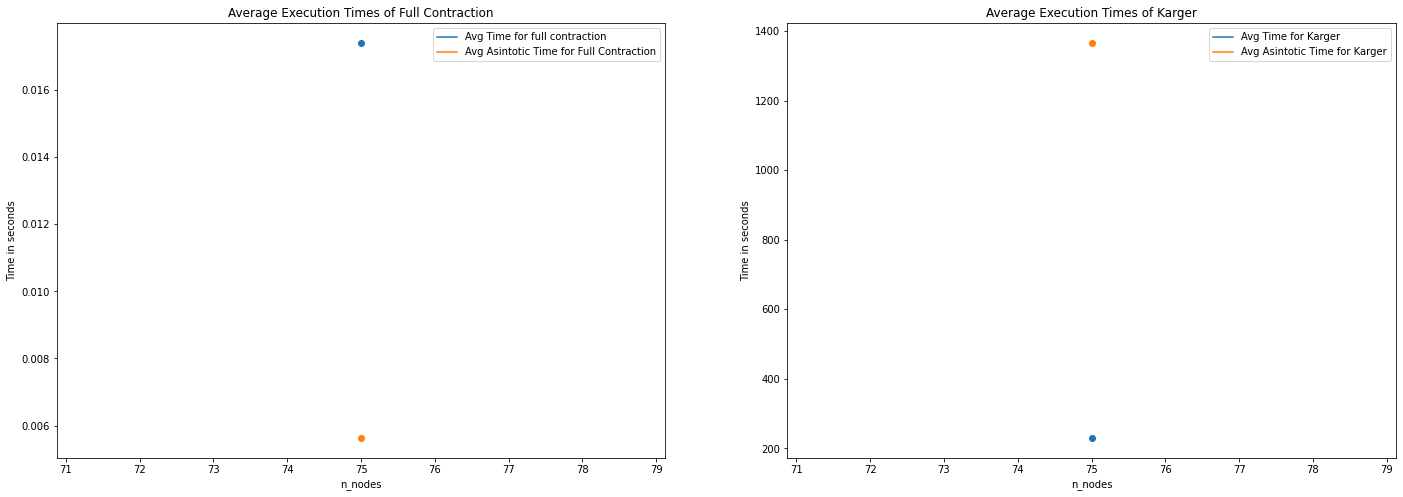

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2)
ax1,ax2=ax

fig.set_figwidth(24)
fig.set_figheight(8)

ax1.plot(keys, average_times_contraction_values,label="Avg Time for full contraction")
ax1.scatter(keys, average_times_contraction_values)
ax1.plot(keys, asintotic_times_contraction_values, label="Avg Asintotic Time for Full Contraction")
ax1.scatter(keys, asintotic_times_contraction_values)

ax2.plot(keys, average_times_karger_values, label="Avg Time for Karger")
ax2.scatter(keys, average_times_karger_values)
ax2.plot(keys, asintotic_times_karger_values, label="Avg Asintotic Time for Karger")
ax2.scatter(keys, asintotic_times_karger_values)

ax1.set_title("Average Execution Times of Full Contraction")
ax1.set_xlabel("n_nodes")
ax1.set_ylabel("Time in seconds")
ax1.legend()

ax2.set_title("Average Execution Times of Karger")
ax2.set_xlabel("n_nodes")
ax2.set_ylabel("Time in seconds")
ax2.legend()

fig.show()